In [1]:
using PyPlot

In [4]:
#Initialize array with ICs
function init(nstart::Int64, nend::Int64, x::Array{Float64,1})
	i = nstart
	pi = 3.14159
	while i <= nend
		x[i] = (i-2)*dx #x starts from zero and goes to nend-1 (periodic conditions) - x[2] = 0.0, x[130]= x[2], x[1] = x[129]
		i = i + 1
	end

	x[end] = x[2]
	x[1] = x[end-1]
    
    sol = sin.(2.0*pi*x)

	return sol
end

init (generic function with 1 method)

In [5]:
function euler_t_step(alpha::Float64,dx::Float64,dt::Float64,nstart::Int64,nend::Int64,sol::Array{Float64,1})

	i = nstart
	#Make temporary copy of array
	temp_sol = copy(sol)

	while i <= nend
        #Diffusive part
		temp_sol[i] = sol[i] + alpha*dt/(dx^2)*(sol[i+1]+sol[i-1]-2.0*sol[i])
        #Advective part
        temp_sol[i] = temp_sol[i] - 0.5*dt/(2.0*dx)*(sol[i+1]^2-sol[i-1]^2)
		
        i = i + 1
	end

	temp_sol[end] = temp_sol[2]
	temp_sol[1] = temp_sol[end-1]

	i = 1
	while i <= length(sol)
		sol[i] = temp_sol[i]
		i = i+1
	end
end

euler_t_step (generic function with 1 method)

In [6]:
function solve_ftcs(alpha::Float64,dt::Float64,dx::Float64,sol::Array{Float64,1},nstart::Int64,nend::Int64,final_time::Float64)

t = 0.0

	while t < final_time
		t = t+dt
		#println("Time is: ",t)

		euler_t_step(alpha,dx,dt,nstart,nend,sol)

	end

	return sol

end

solve_ftcs (generic function with 1 method)

In [7]:
function plot_solution(x::Array{Float64,1},sol::Array{Float64,1},string_val::String)

plot(x[2:end-1],sol[2:end-1],linewidth=1.0,label=string_val)

end

plot_solution (generic function with 1 method)

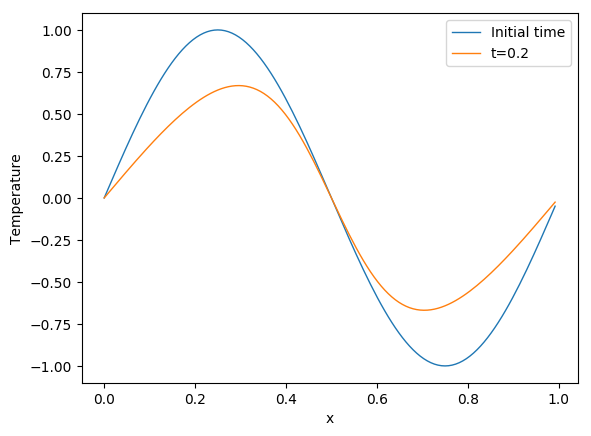

In [8]:
#FTCS for a given number of time steps - Burgers

alpha = 0.1# Float64
npoints = 130# Int64 - 128 + 2 ghost points

nstart = 2
nend = 129

lx = 1.0# Float64

dx = lx/(nend-nstart+1)#Automatically Float64

#Create array of zeros to store our solution
sol = zeros(Float64,npoints)
x = zeros(Float64,npoints)

sol = init(nstart, nend, x)

# println(sol)
# println(x)
# exit()

dt = 0.4*(dx^2)/(alpha)
final_time = 0.1

figure()
xlabel("x")
ylabel("Temperature")

plot_solution(x,sol,"Initial time")

sol = solve_ftcs(alpha,dt,dx,sol,nstart,nend,final_time)

plot_solution(x,sol,"t=0.2")
legend()
savefig("Check.png")